In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("RothBot Data Analysis - Week 1")
print("Analyzing Van Halen's Discography")

RothBot Data Analysis - Week 1
Analyzing Van Halen's Discography


In [2]:
# Load discography
df = pd.read_csv('../data/van_halen_discography.csv')

print(f"Total songs: {len(df)}")
print(f"Albums: {df['album_name'].nunique()}")
print(f"Years: {df['release_year'].min()} - {df['release_year'].max()}")

df.head()

Total songs: 5
Albums: 3
Years: 1978 - 1984


,album_name,release_year,song_title,track_number,era
0,Van Halen,1978,Eruption,2,DLR
1,Van Halen,1978,You Really Got Me,3,DLR
2,Van Halen II,1979,Dance the Night Away,2,DLR
3,1984,1984,Jump,1,DLR
4,1984,1984,Panama,2,DLR


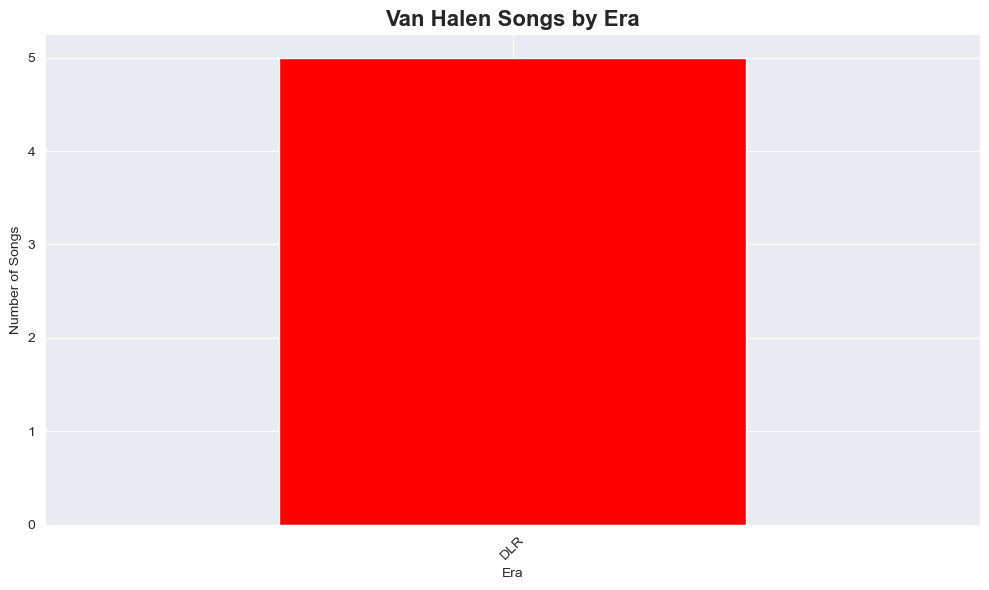

DLR: 5 songs (starting 1978)


In [3]:
# Songs by era
era_counts = df['era'].value_counts()

plt.figure(figsize=(10, 6))
era_counts.plot(kind='bar', color=['red', 'blue', 'green', 'orange'])
plt.title('Van Halen Songs by Era', fontsize=16, fontweight='bold')
plt.xlabel('Era')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary
for era in era_counts.index:
    count = era_counts[era]
    years = df[df['era'] == era]['release_year'].min()
    print(f"{era}: {count} songs (starting {years})")

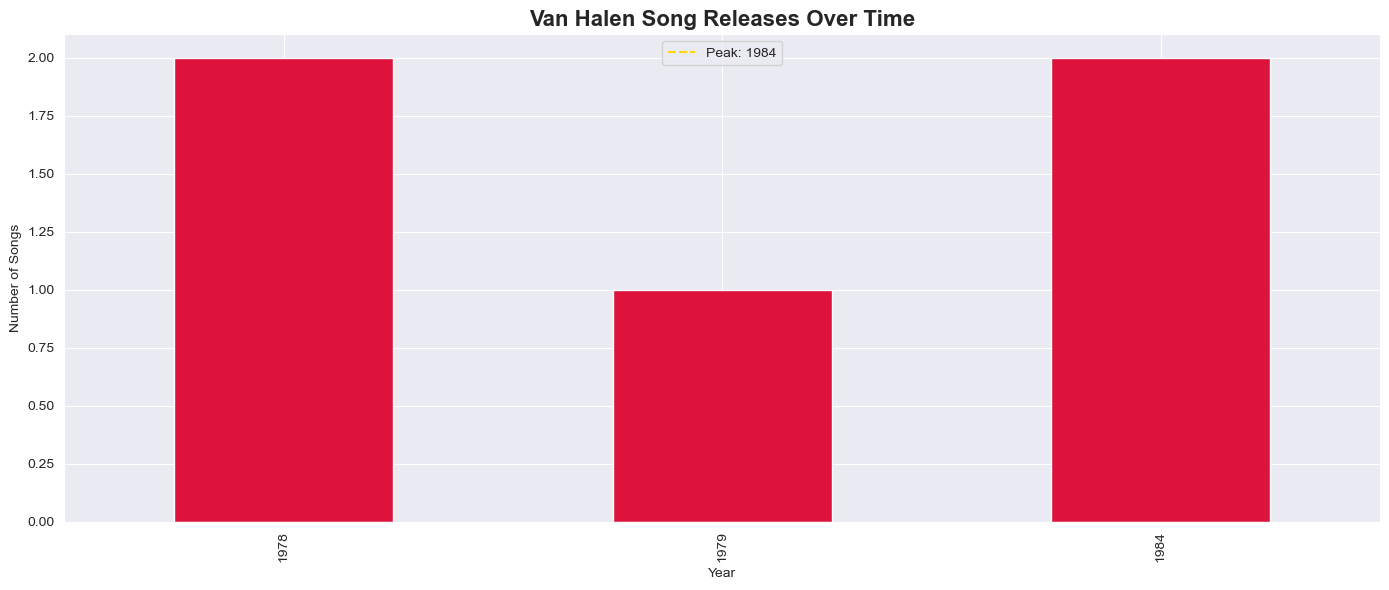

In [4]:
# Songs per year
songs_per_year = df.groupby('release_year').size()

plt.figure(figsize=(14, 6))
songs_per_year.plot(kind='bar', color='crimson')
plt.title('Van Halen Song Releases Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.axvline(x=1984-1978, color='gold', linestyle='--', label='Peak: 1984')
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
import os
from collections import Counter
import string
import re

def slugify(name: str) -> str:
    """Normalize a song/title to the same slug used by the scripts/get_genius_lyrics.py"""
    return re.sub(r'[_]+', '_', re.sub(r'\W+', '_', name)).strip('_').lower()

def load_lyrics(song_name):
    """Load lyrics from file using normalized slug filenames"""
    filename = f"../data/lyrics/{slugify(song_name)}.txt"
    try:
        with open(filename, 'r', encoding='utf-8') as f:
            return f.read()
    except FileNotFoundError:
        return None

def analyze_lyrics(lyrics):
    """Basic lyric analysis"""
    if not lyrics:
        return None
    
    # Clean text
    lyrics = lyrics.lower()
    lyrics = lyrics.translate(str.maketrans('', '', string.punctuation))
    
    # Word count
    words = lyrics.split()
    word_count = len(words)
    unique_words = len(set(words))
    
    # Common words (excluding common English words)
    stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for',
                  'of', 'with', 'is', 'was', 'are', 'been', 'be', 'have', 'has', 'had',
                  'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might',
                  'i', 'you', 'he', 'she', 'it', 'we', 'they', 'my', 'your', 'oh'}
    
    content_words = [w for w in words if w not in stop_words and len(w) > 2]
    common_words = Counter(content_words).most_common(10)
    
    return {
        'word_count': word_count,
        'unique_words': unique_words,
        'vocabulary_richness': unique_words / word_count if word_count > 0 else 0,
        'common_words': common_words
    }

# Analyze a few songs (use titles or already-slugged names)
test_songs = ['Jump', 'Panama', 'Hot for Teacher']

print("LYRIC ANALYSIS")
print("=" * 60)
for song in test_songs:
    lyrics = load_lyrics(song)
    if lyrics:
        analysis = analyze_lyrics(lyrics)
        print(f"\n{song.upper().replace('_', ' ')}")
        print(f"  Words: {analysis['word_count']}")
        print(f"  Unique: {analysis['unique_words']}")
        print(f"  Richness: {analysis['vocabulary_richness']:.2f}")
        print(f"  Top words: {', '.join([w for w, c in analysis['common_words'][:5]])}")

LYRIC ANALYSIS

JUMP
  Words: 178
  Unique: 63
  Richness: 0.35
  Top words: jump, ahead, well, got, cant

PANAMA
  Words: 172
  Unique: 102
  Richness: 0.59
  Top words: panama, her, down, coming, hot

HOT FOR TEACHER
  Words: 248
  Unique: 110
  Richness: 0.44
  Top words: bad, got, teacher, man, hot


## Findings So Far

[Write 3-5 observations about what you discovered]

## Next Steps

1. Collect more lyric data
2. Compare DLR vs Sammy Hagar eras
3. Analyze musical features (if Spotify API available)
4. Build a word cloud of common themes
5. Look for patterns in song structures

## Questions to Explore

- What makes Van Halen lyrics distinctive?
- How did their style evolve over time?
- What themes appear most frequently?
- Are there signature musical patterns?